In [1]:
from uips.options import UIPSOptions, stepOptions
from uips import UIPS_INPUT_DIR
from uips.wrapper import downsample_dataset_from_input
import numpy as np

import matplotlib.pyplot as plt


In [11]:
ndat = int(1e5)
nSampl = 1000
ds = np.random.multivariate_normal([0, 0], np.eye(2), size=ndat)

step1_options = stepOptions(
    nEpochs = 5,
    batch_size_train = 2048,
    nWorkingData = ndat,
    learning_rate = 2e-4,
    nCouplingLayer = 2,
    num_bins = 4,
    hidden_features = 12,
    num_blocks = 3
)
step2_options = stepOptions(
    nEpochs = 20,
    batch_size_train = 2048,
    nWorkingData = ndat,
    learning_rate = 2e-4,
    nCouplingLayer = 2,
    num_bins = 8,
    hidden_features = 12,
    num_blocks = 3
)

downsampler_options = UIPSOptions(
    stepOptionsList=[step1_options, step2_options],
    num_pdf_iter = 2,
    pdfMethod = "NormalizingFlow",
    use_gpu = False,
    printTiming = True,
    nDatReduced = -1,
    nDimReduced = -1,
    preShuffled = True,
    scalerFile = "scaler.npz",
    nSamples_list = [nSampl],
    computeDistanceCriterion = True,
    prefixDownsampledData = "downSampledData",
    data_freq_adjustment = 1,
    nWorkingDataAdjustment = -1,
    dataFile = "../data/combustion2DToDownsampleSmall.npy",
    batch_size_eval = 2.5e4,
    seed = 42
)

downsample_ds = downsample_dataset_from_input(downsampler_options, ds)

Dataset has 100000 samples of dimension 2
LOAD DATA ... DONE!
RESCALE DATA ... DONE!
RANDOM: 
	 nSample 1000 mean dist = 0.0662, std dist = 0.0728


	 nSample 100000 mean dist = 0.0068, std dist = 0.0109
There are 2494 trainable parameters in this model.
Loss 2.5486 Step 980 / 980  |██████████████████████████████████████████████████| 100.0% Complete
Time Train : 44.28s
Eval Step 4 / 4  |██████████████████████████████████████████████████| 100.0% Complete
Time Eval : 0.86s
TRAIN ITER 0
	 nSample 1000 mean dist = 0.1046, std dist = 0.0780
	 nSample 100000 mean dist = 0.0068, std dist = 0.0109
There are 2806 trainable parameters in this model.
Loss 2.5585 Step 980 / 980  |██████████████████████████████████████████████████| 100.0% Complete
Time Train : 55.51s
Eval Step 4 / 4  |██████████████████████████████████████████████████| 100.0% Complete
Time Eval : 0.87s
TRAIN ITER 1
	 nSample 1000 mean dist = 0.1044, std dist = 0.0789
	 nSample 100000 mean dist = 0.0068, std dist = 0.0109


For sample 1000 use downSampledData_1000_it0.npz




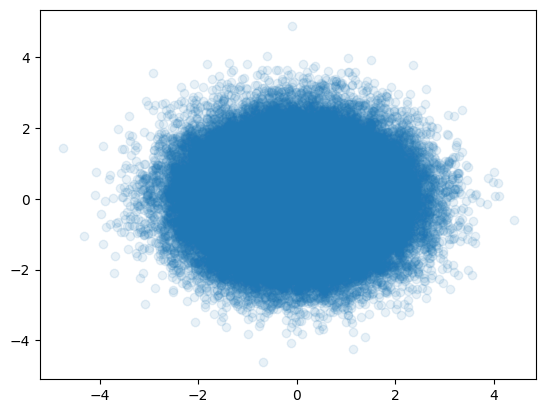

In [12]:
plt.scatter(ds[:,0], ds[:,1], alpha=0.1)

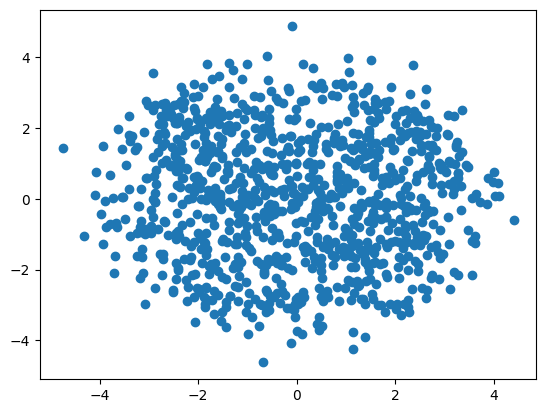

In [14]:
plt.scatter(downsample_ds[1000][1].data[:,0], downsample_ds[1000][1].data[:,1])